In [184]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
gg_df = pd.read_csv('../Data Preprocessing/myGooglePlay_clean.csv')
ap_df = pd.read_csv('../Data Preprocessing/myAppleStore_clean.csv')
it_df = pd.read_csv('../Data Preprocessing/myAppleStore_new_clean.csv')


# Comparison of same app
We pick those apps which are downloadable from both stores and compare their size, ratings, etc

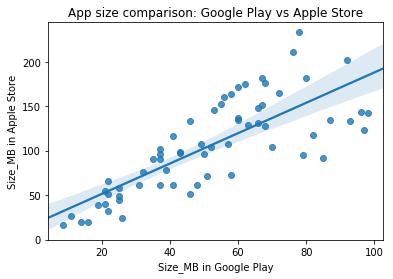

In [185]:
mrg = pd.merge(gg_df, it_df, on=['App'], how='inner')
mrg.rename(columns={'Size_M_x':'Size_MB in Google Play','Size_M_y':'Size_MB in Apple Store',\
                    'Rating_x':'Rating in Google Play','Rating_y':'Rating in Apple Store',\
                    'Category_y':'Category'},inplace=True)
mrg = mrg[mrg['Size_MB in Google Play']!=0]
mrg['Size_rate'] = mrg['Size_MB in Apple Store']/mrg['Size_MB in Google Play']
mrg = mrg[mrg['Size_rate']<3]
sns.regplot(x = 'Size_MB in Google Play', y = 'Size_MB in Apple Store', data = mrg).set_title('App size comparison: Google Play vs Apple Store');

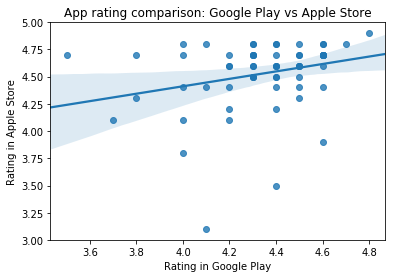

In [186]:
mrg['Rating_rate'] = mrg['Rating in Apple Store']/mrg['Rating in Google Play']
sns.regplot(x = 'Rating in Google Play', y = 'Rating in Apple Store', data = mrg).set_title('App rating comparison: Google Play vs Apple Store');

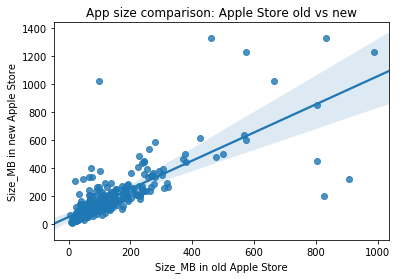

In [187]:
mrg2 = pd.merge(ap_df, it_df, on=['App'], how='inner')
mrg2.rename(columns={'Size_M_x':'Size_MB in old Apple Store','Size_M_y':'Size_MB in new Apple Store',\
                    'Rating_x':'Rating in old Apple Store','Rating_y':'Rating in new Apple Store',\
                    'Category_y':'Category'},inplace=True)
#mrg['Size_rate'] = mrg['Size_MB in Apple Store']/mrg['Size_MB in Google Play']
mrg2 = mrg2[mrg2['Size_MB in old Apple Store']<1000]
sns.regplot(x = 'Size_MB in old Apple Store', y = 'Size_MB in new Apple Store', data = mrg2).set_title('App size comparison: Apple Store old vs new');

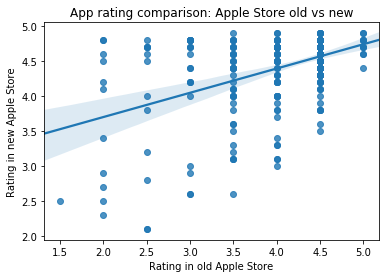

In [188]:
sns.regplot(x = 'Rating in old Apple Store', y = 'Rating in new Apple Store',data = mrg2).set_title('App rating comparison: Apple Store old vs new');

# Comparison of statistics
We compare some statistics from the two datasets.

[Text(0.5, 0, 'Rating')]

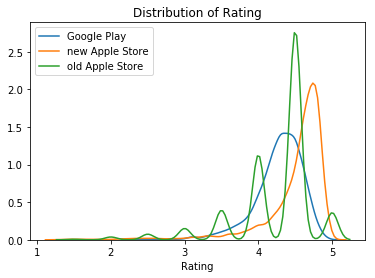

In [189]:
fig, ax = plt.subplots()
sns.kdeplot(gg_df['Rating'], ax=ax, label='Google Play');
sns.kdeplot(it_df['Rating'], ax=ax, label='new Apple Store');
sns.kdeplot(ap_df['Rating'], ax=ax, label='old Apple Store');
ax.set_title('Distribution of Rating');
ax.set(xlabel='Rating')

[Text(0.5, 0, 'Size_MB')]

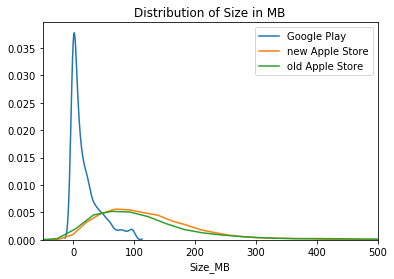

In [190]:
fig, ax = plt.subplots()
sns.kdeplot(gg_df['Size_M'], ax=ax, label='Google Play');
sns.kdeplot(it_df['Size_M'], ax=ax, label='new Apple Store');
sns.kdeplot(ap_df['Size_M'], ax=ax, label='old Apple Store');
ax.set_xlim(-50,500);
ax.set_title('Distribution of Size in MB');
ax.set(xlabel='Size_MB')

[Text(0.5, 0, 'Price_dollar')]

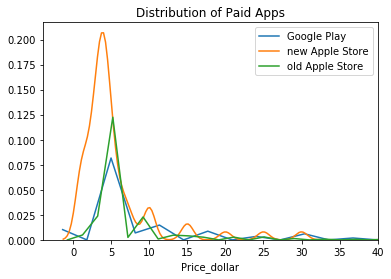

In [191]:
fig, ax = plt.subplots()
gg_df_p = gg_df[gg_df['Price']>0]
ap_df_p = ap_df[ap_df['Price']>0]
it_df_p = it_df[it_df['Price']>0]

sns.kdeplot(gg_df_p['Price'], ax=ax, label='Google Play');
sns.kdeplot(it_df_p['Price'], ax=ax, label='new Apple Store');
sns.kdeplot(ap_df_p['Price'], ax=ax, label='old Apple Store');
ax.set_xlim(-4,40);
ax.set_title('Distribution of Paid Apps');
ax.set(xlabel='Price_dollar')

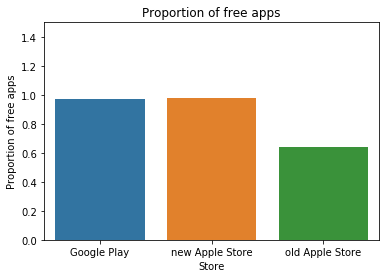

In [192]:
fig, ax = plt.subplots()
gg_df_f = gg_df[gg_df['Price']==0]
ap_df_f = ap_df[ap_df['Price']==0]
it_df_f = it_df[it_df['Price']==0]
gg_r = gg_df_f.shape[0]/gg_df.shape[0]
ap_r = ap_df_f.shape[0]/ap_df.shape[0]
it_r = it_df_f.shape[0]/it_df.shape[0]
n = pd.DataFrame([['Google Play',gg_r],['new Apple Store',it_r],['old Apple Store',ap_r]])
n.rename(columns={0:'Store',1:'Proportion of free apps'},inplace=True)
sns.barplot(x='Store',y='Proportion of free apps',data=n, ax=ax);
ax.set_ylim(0,1.5);
ax.set_title('Proportion of free apps');